# Trabajo Final de Graduación
Daniel Núñez Vargas

In [20]:
import matplotlib.pyplot as plt
from Funciones import normalize_block_name, limpiar_entorno # Script donde se han incluido variedad de funciones personalizadas
import pandas as pd
import numpy as np
import re
import os
import geopandas as gdp
import contextily as ctx

In [ ]:
# Se cargan los datos
df = pd.read_csv("../Input/Incidents_2025.csv") # Data en .csv

gdf = gdp.read_file("../Input/Incidents_2025.shp") # Cartografía de los datos

Haciendo un plot sobre los datos de la cartografía

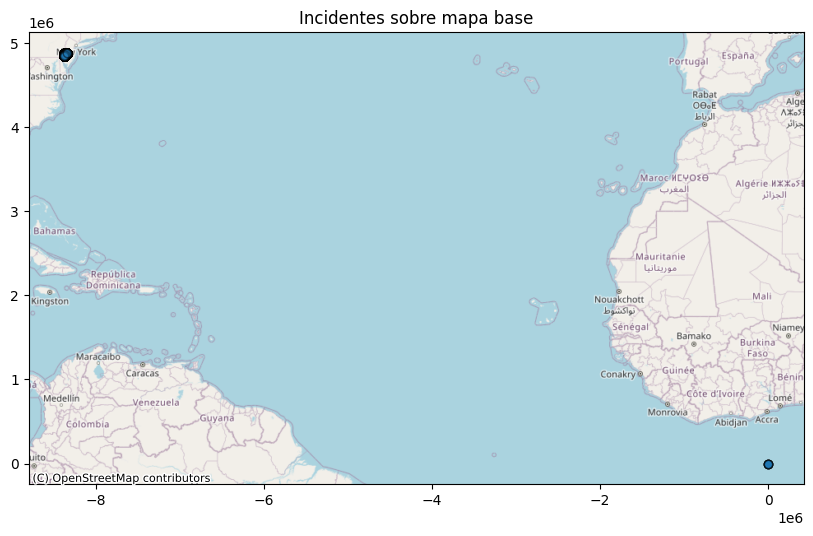

In [ ]:

gdf = gdf.to_crs(epsg=3857)

ax = gdf.plot(figsize=(10, 10), edgecolor='black', alpha=0.5)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.title("Incidentes sobre mapa base")
plt.show()

In [22]:
gdf

,objectid,dc_dist,psa,dispatch_d,dispatch_1,dispatch_t,hour,dc_key,location_b,ucr_genera,text_gener,point_x,point_y,geometry
0,29086214,03,2,2025-05-03,2025-05-02,23:44:00,23,2.025030e+11,1100 BLOCK S 4TH ST,300,Robbery No Firearm,-75.150833,39.934248,POINT (-8365752.513 4856391.962)
1,28777819,09,1,2025-04-23,2025-04-23,18:18:00,18,2.025090e+11,300 BLOCK MARTIN LUTHER KING DR,300,Robbery No Firearm,-75.178868,39.962990,POINT (-8368873.35 4860565.488)
2,29429836,19,3,2025-05-13,2025-05-12,21:04:00,21,2.025190e+11,5100 BLOCK LANCASTER AVE,300,Robbery No Firearm,-75.226406,39.977061,POINT (-8374165.158 4862609.401)
3,28777844,22,4,2025-04-23,2025-04-23,18:32:00,18,2.025220e+11,1700 BLOCK N 32ND ST,300,Robbery No Firearm,-75.186199,39.983588,POINT (-8369689.438 4863557.632)
4,28777849,25,4,2025-04-24,2025-04-24,00:47:00,0,2.025250e+11,1300 BLOCK W Venango St,300,Robbery No Firearm,-75.149843,40.007425,POINT (-8365642.274 4867021.297)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83368,25130787,09,5,2025-01-17,2025-01-16,20:59:00,20,2.025090e+11,500 BLOCK MARKET ST,300,Robbery No Firearm,-75.148981,39.950549,POINT (-8365546.315 4858758.827)
83369,25519941,26,1,2025-02-18,2025-02-18,13:36:00,13,2.025260e+11,2000 BLOCK N 8TH ST,500,Burglary Residential,-75.147055,39.982800,POINT (-8365331.941 4863443.179)
83370,24807383,16,2,2025-01-17,2025-01-17,11:48:00,11,2.025160e+11,4500 BLOCK NEHEMIAH WAY,400,Aggravated Assault No Firearm,-75.212196,39.959619,POINT (-8372583.317 4860075.978)
83371,24777692,12,1,2025-01-17,2025-01-17,11:26:00,11,2.025120e+11,3800 BLOCK Island Av,600,Thefts,-75.236249,39.893877,POINT (-8375260.975 4850532.693)


## Descripción de los datos

Las variables que componen estos datos son:

- **the_geom**: Geometría espacial en formato WKT (Well-Known Text) - representa la ubicación geográfica exacta del incidente
- **cartodb_id**: Identificador único secuencial asignado por CartoDB para cada registro
- **the_geom_webmercator**: Geometría espacial en proyección Web Mercator - formato optimizado para mapas web
- **objectid**: Identificador único del objeto en la base de datos original del sistema policial
- **dc_dist**: Código del distrito policial (1-25) - división administrativa de la policía de Filadelfia
- **psa**: Área de Servicio Policial (Police Service Area) - subdivisión más pequeña dentro de cada distrito
- **dispatch_date_time**: Fecha y hora completa cuando se despachó la llamada de emergencia
- **dispatch_date**: Solo la fecha cuando se despachó la llamada (formato YYYY-MM-DD)
- **dispatch_time**: Solo la hora cuando se despachó la llamada (formato HH:MM:SS)
- **hour**: Hora del día extraída de dispatch_time (0-23) - útil para análisis temporal
- **dc_key**: Clave única del incidente en el sistema de despacho - combina fecha y número secuencial
- **location_block**: Descripción textual de la cuadra donde ocurrió el incidente (ej: "1100 BLOCK S 4TH ST")
- **ucr_general**: Código numérico del Uniform Crime Reporting (UCR) - sistema estándar de clasificación de delitos
- **text_general_code**: Descripción textual del tipo de delito según clasificación UCR
- **point_x**: Coordenada X (longitud) en sistema de coordenadas de Pensilvania
- **point_y**: Coordenada Y (latitud) en sistema de coordenadas de Pensilvania
- **lat**: Latitud en grados decimales (WGS84) - coordenada geográfica estándar
- **lng**: Longitud en grados decimales (WGS84) - coordenada geográfica estándar

Hay varias variables que para efectos del análisis no resultan imporantes, como los identificadores únicos **cartodb_id**, **objectid** y **dc_key**. Además, hay algunas otras que explican lo mismo, como lo son las **dispatch_date_time** con **dispatch_date** y **hour**. Asimismo, **point_x** y **point_y** que dan las coordenadas de acuerdo al formato local. Otras variables que a priori se pueden omitir serán **the_geom** y **the_geom_webmercartor**, ya que se le dará prioridad al uso de latitud y longitud en formato estándar (WGS84) para identificación geoespacial de patrones.

Por el momento, la lista de variables que se utilizarán serán:

In [4]:
df_filter = df[['lat', 'lng', 'hour', 'dispatch_date', 'dc_dist', 'psa', 'ucr_general', 'text_general_code', 'location_block']]
df_filter.head(5)

,lat,lng,hour,dispatch_date,dc_dist,psa,ucr_general,text_general_code,location_block
0,39.934248,-75.150833,23,2025-05-02,3,2,300,Robbery No Firearm,1100 BLOCK S 4TH ST
1,39.962990,-75.178868,18,2025-04-23,9,1,300,Robbery No Firearm,300 BLOCK MARTIN LUTHER KING DR
2,39.977061,-75.226406,21,2025-05-12,19,3,300,Robbery No Firearm,5100 BLOCK LANCASTER AVE
3,39.983588,-75.186199,18,2025-04-23,22,4,300,Robbery No Firearm,1700 BLOCK N 32ND ST
4,40.007425,-75.149843,0,2025-04-24,25,4,300,Robbery No Firearm,1300 BLOCK W Venango St


Dado que las coordenadas geográficas serán variables claves dentro del modelo, lo primero será la forma de tratarlas en caso en donde no hayan datos. Lo primero que se nota es que se identificaron 2922 registros que no presentan información sobre latitud o longitud. El primer acercamiento que tendremos será identificar estas observaciones y analizar sus similitudes con observaciones que sí tengan información sobre sus coordenadas.

In [5]:
# Se filtran aquellas observaciones que no tienen algunas de las coordenadas
df_nan = df_filter[(df_filter['lat'].isna()) | (df_filter['lng'].isna())]
# Ahora se extren las ubicaciones de manera única
location_blocks_nan = df_nan['location_block'].unique()

df_temp = df_filter[df_filter['location_block'].str.contains(
    r'1900\s+block\s+s\s+christopher\s+columbus', 
    case=False, na=False
)]

print(df_temp[['location_block', 'lat', 'lng']].head(2))

                             location_block        lat        lng
130   1900 BLOCK S CHRISTOPHER COLUMBUS BLV        NaN        NaN
194  1900 BLOCK S CHRISTOPHER COLUMBUS BLVD  39.922174 -75.142375


Notamos algo interesante ya que para un registro sí se tienen coordenadas de ese bloque mientras que para otro no, siendo la única diferencia entre registros la palabra "BLVD". Este compartamiento se repite para miles de observaciones, por lo que el primer paso será depurar la variable location_block, ya que esta nos permitirá realizar la imputación basándonos en el bloque en el ocurrió el delito.

Ahora se aplica dicha función a todos los registros:

In [6]:
df_filter['location_block_normalized'] = df_filter['location_block'].apply(normalize_block_name)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_19144\3097380153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['location_block_normalized'] = df_filter['location_block'].apply(normalize_block_name)


Ahora examinamos la cardinalidad de las variables latitud y longitud, por bloque: 

In [7]:
coordinates_info_by_block = (df_filter.groupby(['location_block_normalized']).agg(
    unique_latitudes=('lat', 'nunique'),
    unique_longitudes=('lng', 'nunique')
)).sort_values(by = 'unique_latitudes', ascending=False)
print(coordinates_info_by_block.head(5))

                           unique_latitudes  unique_longitudes
location_block_normalized                                     
4000 BLOCK LANCASTER AVE                 38                 38
GERMANTOWN AVE                           33                 34
N BROAD ST                               33                 33
FRANKFORD AVE                            31                 31
3100 BLOCK KENSINGTON AVE                30                 30


Como se observa en el cuadro anterior, un bloque puede tener más de una latitud y longitud. Esto sucede porque los bloques fueron redondeados al bloque de cien más cercano. Tomemos el caso que presenta mayor cardinalidad para efectos de la explicación, el cual es **4000 BLOCK LANCASTER AVE**. 

Si tomamos todas las longitudes y latitudes para este bloque, y se calcula el mínimo y el máximo nos damos cuenta que realmente todos lo registros en latitud están entre los 39.9631° y los 39.9652°. De manera análoga para longitud, ubicando todos los crímenes entre los -75.2055° y los -75.2026°.

In [8]:
df_temp = df_filter[df_filter['location_block_normalized'] == '4000 BLOCK LANCASTER AVE'][['location_block_normalized', 'lat', 'lng']]
print(df_temp['lat'].quantile([0,1]).round(4))
print(df_temp['lng'].quantile([0,1]).round(4))

0.0    39.9631
1.0    39.9652
Name: lat, dtype: float64
0.0   -75.2055
1.0   -75.2026
Name: lng, dtype: float64


Aunque existan diferentes longitudes y latitudes para un mismo bloque, este hallazgo lo que nos indica es que la diferencia en términos de grados es marginal por lo que para efectos de hacer imputación para aquellos registros que no tienen coordenadas, se tomará el primer set de coordenadas encontradas para dicho bloque. 

In [ ]:
# Extraemos los registros que NO tienen missing en sus coordenadas
df_non_nan_unique = (
    df_filter[~(df_filter['lat'].isna() | df_filter['lng'].isna())]
    .sort_values('dispatch_date')  # opcional: para priorizar por fecha
    .drop_duplicates(subset='location_block_normalized', keep='first')
    [['location_block_normalized', 'lat', 'lng']]
)
# Se filtran aquellas observaciones que SÍ tienen missing en sus coordenadas
df_nan_clean = df_filter[(df_filter['lat'].isna()) | (df_filter['lng'].isna())].drop(['lat', 'lng'], axis=1)
# Se procede a hacer el leftjoin entre ambos datasets
df_nan_join = df_nan_clean.merge(
    df_non_nan_unique,
    on='location_block_normalized',
    how='left',
)

Esto nos corrige bastantes registros como observamos anteriormente:

In [10]:
df_nan_join[['location_block_normalized', 'lat', 'lng']].head(10)

,location_block_normalized,lat,lng
0,1900 BLOCK S CHRISTOPHER COLUMBUS BLVD,39.922174,-75.142375
1,GERMANTOWN AVE,40.023927,-75.159552
2,1600 BLOCK S CHRISTOPHER COLUMBUS BLVD,39.925683,-75.143078
3,1600 BLOCK S CHRISTOPHER COLUMBUS BLVD,39.925683,-75.143078
4,7900 BLOCK E ROOSEVELT BLVD,40.055555,-75.049197
5,12000 BLOCK E ROOSEVELT BLVD,40.105865,-75.003306
6,2100 BLOCK MAGEE AVE,40.036936,-75.066568
7,E CHELTENHAM AVE,40.017513,-75.065115
8,1200 BLOCK S FRONT ST,39.931280,-75.146197
9,2600 BLOCK W BERKS ST,39.984736,-75.176187


Tratando los missing values de esta forma, hemos podido recuperar información de 2502 observaciones, dejando apenas 420 cuyos registros de latitud y longitud aún siguen en NULL. Dentro de este mundo de observaciones se destaca un caso como el siguiente:

In [11]:
df_still_nan = df_nan_join[df_nan_join['lat'].isna() | df_nan_join['lng'].isna()]
df_still_nan[df_still_nan['location_block_normalized'].str.contains('6500 BLOCK HAVERFORD')][['location_block_normalized']]


,location_block_normalized
102,6500 BLOCK HAVERFORD AVE
2293,6500 BLOCK HAVERFORD AVE


Si buscamos coincidencias en la base de datos que no tiene valores nulos, nos damos cuenta que:

In [12]:
df_non_nan = df_filter[~(df_filter['lat'].isna() | df_filter['lng'].isna())]
len(df_non_nan[df_non_nan['location_block_normalized'].str.contains('6500 BLOCK HAVERFORD')])

0

Dado que no existe ninguna coincidencia, esto da una idea que para imputar los datos de las 420 la mejor manera posible se requeriría un análisis individualizado, sin embargo, es más el costo en el que incurriría que el simple hecho de descartarlas para efectos del trabajo propuesto, ya que solo representan un 0.52% del número total de registros

In [13]:
df_nan_filled = df_nan_join[['lat', 'lng', 'hour', 'dispatch_date', 'dc_dist', 'psa', 'ucr_general', 'text_general_code', 'location_block', 'location_block_normalized']]
df_non_nan_gps = pd.concat([df_non_nan, df_nan_filled]).dropna(subset=['lat', 'lng'])
len(df_still_nan)/len(df_non_nan_gps)*100

0.5212082102702836

In [22]:
# Lista de variables a borrar
variables_a_borrar = ['coordinates_info_by_block', 'df', 'df_filter', 'df_nan', 'df_nan_clean', 'df_nan_filled', 'df_nan_join', 'df_non_nan', 'df_non_nan_unique', 'df_still_nan', 'df_temp', 'location_blocks_nan', 'var', 'var_name']
for var_name in variables_a_borrar:
   if var_name in globals():
       del globals()[var_name]

Del resto de variables que nos quedan, solo hay una que presenta missings y esta es PSA, el Área de Servicio Policial. A priori solo son 11 observaciones, pero ahora que tenemos un nombre de bloque mucho más normalizado y coordenadas para todos los registros estudiados, será directo mapear estos valores. 

Si bien es cierto que 11 observaciones es algo marginal, se hace también con la itención de que si el día de mañana se presentan datos con muchos más missings, ya existe un proceso automatizado que se encargue de imputar estos valores basandonos en el bloque y coordenadas.

In [30]:
df_non_psa_nan = (
    df_non_nan_gps[~(df_non_nan_gps['psa'].isna())]
    .sort_values('dispatch_date')  # opcional: para priorizar por fecha
    .drop_duplicates(subset='location_block_normalized', keep='first')
    [['location_block_normalized', 'psa', 'lat', 'lng']]
)

df_psa_nan = df_non_nan_gps[df_non_nan_gps['psa'].isna()].drop(['psa'], axis=1)

df_join = df_psa_nan.merge(
    df_non_psa_nan,
    on='location_block_normalized',
    how='left',
)